In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.read_csv('Brazil_Data.csv')

In [6]:
radiance_threshold = df['radiance_avg'].median()
speed_threshold = df['avg_d_kbps'].median()

df['digital_dark_zone'] = (df['radiance_avg'] < radiance_threshold) & (df['avg_d_kbps'] < speed_threshold)

In [7]:
X = df[['radiance_avg', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices']]
y = df['digital_dark_zone']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[32340     0]
 [    1 16507]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     32340
        True       1.00      1.00      1.00     16508

    accuracy                           1.00     48848
   macro avg       1.00      1.00      1.00     48848
weighted avg       1.00      1.00      1.00     48848



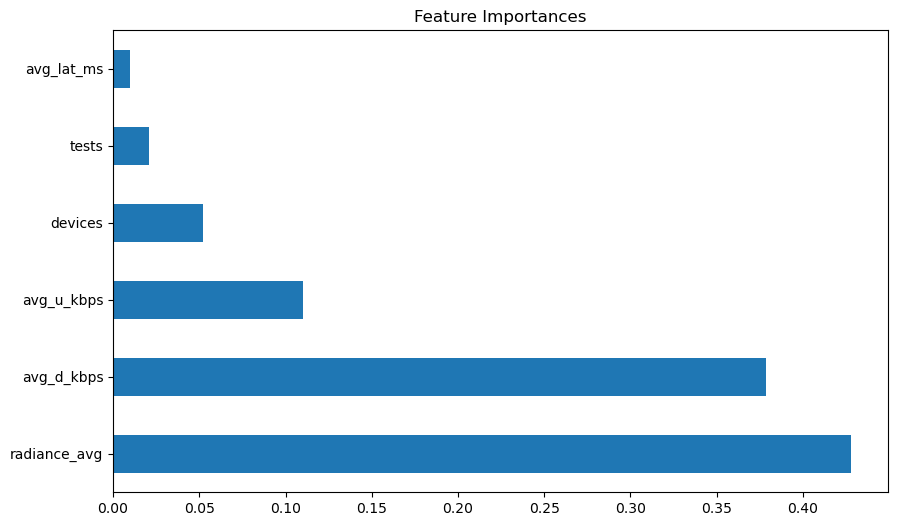

In [8]:
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()